<a href="https://colab.research.google.com/github/Frederico-Gribaudi/MVP_Frederico_Gribaudi_Sprint_analise_exploratoria/blob/main/Classifica%C3%A7%C3%A3o_personalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Frederico Francesco Gribaudi Cardozo





# **1) Descrição do Problema**

O conjunto de dados escolhido é multivariado que consiste em resultados de testes psicológicos, categorizando pessoas em três tipos distintos de personalidade: introvertido, extrovertido e ambivertido. O objetivo principal é classificar o tipo de personalidade com base em resultados de testes psicológicos considerando vinte e nove características.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existem características-chave, ou seja mais importantes que outras para a determinação da personalidade?

- A personalidade ambivertida seria apenas uma exclusão de valores altos em características-chave para a classificação de personalidade?

- A personalidade introvertida é mais facilmente separável das outras duas personalidades?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é prever a qual das três personalidades uma pessoa se encaixa.

## Seleção de Dados

O dataset escolhido estava listado como "trending dataset" no site kaggle, e tem sido usado por pessoas que estão aprendendo ou praticando *Machine Learning*. Link para o dataset:  [Introvert, Extrovert & Ambivert Classification](https://www.kaggle.com/datasets/miadul/introvert-extrovert-and-ambivert-classification/data)

## Atributos do Dataset

O dataset contém 20,000 amostras, com  quantidades de amostras similares de cada uma das três personalidades, **34%** de extrovertidos, **33%** de introvertidos e **33%** de ambivertidos.

Possui trinta atributos:

* **personality type**: tipo de personalidade
* **social energy**: energia social
* **alone time preference**: preferência por solidão
* **talkativeness**: gostar de falar
* **deep reflection**: reflexão profunda
* **group confort**: conforto ao estar em grupo
* **party liking**: gostar de festejar
* **listening skill**: capacidade de escutar
* **empathy**: empatia
* **creativity**: criatividade
* **organization**: organização
* **leadership**: liderança
* **risk taking**: propensão ao risco
* **public speaking comfort**: conforto ao falar em público
* **curiosity**: curiosidade
* **routine preference**: preferência por rotina
* **excitement seeking**: busca por excitação
* **friendliness**: amigável
* **emotional stability**: estabilidade emocional
* **planning**: planejamento
* **spontaneity**: espontaneidade
* **adventurousness**: espírito aventureiro
* **reading habit**: hábito de leitura
* **sports interest***: interesse por esportes
* **online social usage**: uso de redes sociais
* **travel desire**: desejo de viajar
* **gadget usage**: uso de dispositivos eletrônicos
* **work style collaborative**: estilo de trabalho colaborativo
* **decision speed**: velocidade na tomada de decisões
* **stress handling**: capacidade de lidar com o estresse


Exceto por **peronality type**, todas as colunas tem valores númericos variando entre 0 e 10 baseado no resultado de testes psicológicos.

# **2) Importação das Bibliotecas Necessárias e Carga de Dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [32]:
# URL do dataset original
url = 'https://raw.githubusercontent.com/Frederico-Gribaudi/MVP_Frederico_Gribaudi_Sprint_analise_exploratoria/refs/heads/main/personality_synthetic_dataset.csv'

# Carregar o DataFrame
df = pd.read_csv(url)

# Dicionário de novos nomes das colunas em snake_case (tradução para o português)
novos_nomes = {
    'personality_type': 'tipo_de_personalidade',
    'social_energy': 'energia_social',
    'alone_time_preference': 'preferencia_por_solidao',
    'talkativeness': 'gostar_de_falar',
    'deep_reflection': 'reflexao_profunda',
    'group_comfort': 'conforto_ao_estar_em_grupo',
    'party_liking': 'gostar_de_festejar',
    'listening_skill': 'capacidade_de_escutar',
    'empathy': 'empatia',
    'creativity': 'criatividade',
    'organization': 'organizacao',
    'leadership': 'lideranca',
    'risk_taking': 'propensao_ao_risco',
    'public_speaking_comfort': 'conforto_ao_falar_em_publico',
    'curiosity': 'curiosidade',
    'routine_preference': 'preferencia_por_rotina',
    'excitement_seeking': 'busca_por_excitacao',
    'friendliness': 'amigavel',
    'emotional_stability': 'estabilidade_emocional',
    'planning': 'planejamento',
    'spontaneity': 'espontaneidade',
    'adventurousness': 'espirito_aventureiro',
    'reading_habit': 'habito_de_leitura',
    'sports_interest': 'interesse_por_esportes',
    'online_social_usage': 'uso_de_redes_sociais',
    'travel_desire': 'desejo_de_viajar',
    'gadget_usage': 'uso_de_dispositivos_eletronicos',
    'work_style_collaborative': 'estilo_de_trabalho_colaborativo',
    'decision_speed': 'velocidade_na_tomada_de_decisoes',
    'stress_handling': 'capacidade_de_lidar_com_o_estresse'
}

# Renomear as colunas
df.rename(columns=novos_nomes, inplace=True)

# Visualizar as novas colunas
print("Novos nomes das colunas:")
print(df.columns.tolist())


Novos nomes das colunas:
['tipo_de_personalidade', 'energia_social', 'preferencia_por_solidao', 'gostar_de_falar', 'reflexao_profunda', 'conforto_ao_estar_em_grupo', 'gostar_de_festejar', 'capacidade_de_escutar', 'empatia', 'criatividade', 'organizacao', 'lideranca', 'propensao_ao_risco', 'conforto_ao_falar_em_publico', 'curiosidade', 'preferencia_por_rotina', 'busca_por_excitacao', 'amigavel', 'estabilidade_emocional', 'planejamento', 'espontaneidade', 'espirito_aventureiro', 'habito_de_leitura', 'interesse_por_esportes', 'uso_de_redes_sociais', 'desejo_de_viajar', 'uso_de_dispositivos_eletronicos', 'estilo_de_trabalho_colaborativo', 'velocidade_na_tomada_de_decisoes', 'capacidade_de_lidar_com_o_estresse']


In [ ]:
# guardo o dataset em um dataframe
df=pd.DataFrame(df)

In [ ]:
# primeiras linhas
df.head(10)

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084
5,Introvert,2.807173,6.326097,2.770085,5.617670,4.752116,0.302630,7.137657,5.399156,4.564805,...,3.888344,1.868406,9.188567,4.817574,3.427446,4.674632,4.027299,3.048724,2.774809,4.560962
6,Introvert,1.537468,7.605496,4.294666,9.166947,3.085335,1.042874,10.000000,5.899131,5.423302,...,7.906636,3.173683,9.458013,2.272047,5.218917,2.745851,4.056359,5.695608,3.230287,6.761266
7,Ambivert,6.636632,4.350586,7.131511,5.455061,2.530413,3.081656,5.177344,5.692996,3.951603,...,3.643867,7.601721,5.803109,5.024010,7.029383,6.990230,7.147859,4.680890,5.107637,7.246737
8,Extrovert,7.330318,2.820421,5.224400,5.053459,7.969032,9.106934,6.717555,7.061661,7.591541,...,4.459566,6.996722,5.980063,9.638288,5.509409,7.513645,8.788241,9.300327,8.086807,5.784908
9,Ambivert,5.377395,4.762184,4.244447,6.399885,4.781680,6.074592,10.000000,5.601565,4.927993,...,7.586472,5.513111,5.950501,2.328848,5.644438,6.251067,3.539273,5.698559,4.079389,6.609341


In [ ]:
# últimas linhas
df.tail(10)

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
19990,Extrovert,8.102639,4.936379,9.580971,4.126549,6.350055,7.071409,4.670796,5.810679,3.961426,...,6.878814,5.574323,5.738097,3.631943,7.339986,5.924529,8.103198,7.748880,4.824774,6.089649
19991,Ambivert,5.250918,4.461787,5.953458,3.751218,5.297386,1.601640,9.748382,5.622223,4.525821,...,6.508603,4.274182,4.130920,8.532600,5.500215,5.653765,6.823472,6.208961,3.673498,3.856171
19992,Introvert,2.601940,8.589375,3.055787,7.537710,4.915021,4.430060,6.370154,9.000249,5.151677,...,5.974863,5.038454,9.182229,5.867759,3.756668,2.908530,2.469546,6.360303,1.877201,7.522244
19993,Extrovert,8.338994,5.608843,9.105338,4.657886,6.368701,7.016968,5.555118,4.619253,7.014191,...,6.745272,9.605230,2.555031,7.315834,8.413087,5.786300,8.029673,8.879529,7.353383,7.061337
19994,Ambivert,6.297109,6.625004,5.269047,7.098544,6.734609,6.541744,6.612903,7.659161,7.026331,...,5.445954,5.447236,6.942709,8.272175,6.236847,4.484729,6.205859,4.139596,8.119065,7.613383
19995,Ambivert,3.783857,4.345803,8.220063,6.297798,5.162622,5.702266,5.518356,3.420139,5.811565,...,8.521256,4.355973,6.454815,2.557365,6.949292,4.176390,5.649897,5.665498,5.252077,4.297520
19996,Introvert,2.621406,8.152097,2.954341,8.791467,2.670252,2.931244,5.855202,5.044124,6.244061,...,4.818308,2.631298,10.000000,3.697801,3.217559,3.638815,5.177155,5.106628,0.982214,5.873321
19997,Introvert,0.039689,8.277160,5.728101,7.790080,3.427897,0.708457,7.099321,5.784592,5.400400,...,3.318511,4.071008,9.974147,2.954407,5.427296,6.270830,3.793430,5.009167,3.810962,5.678412
19998,Extrovert,7.756725,3.956191,8.906972,3.793775,7.608467,6.292705,6.824980,5.653421,7.347820,...,7.156525,8.148780,3.840900,6.093418,7.814507,8.428745,8.736932,8.060841,8.161087,5.941793
19999,Introvert,3.225794,8.058594,0.000000,10.000000,6.363376,0.242722,9.307219,7.621912,5.919581,...,5.097344,2.720616,7.344312,5.566736,6.350940,2.997643,5.991222,3.964673,1.967942,5.810435


Checando as primeiras e as últimas 10 entradas, tudo indica que o dataset foi corretamente carregado em um dataframe.

# **3) Análise de Dados**

## Total e Tipo das Instâncias

O dataset possui **20,000** instâncias (observações), com **6,570** instâncias para introvertido, **6,857** instâncias para extrovertido e **6,573** instâncias para ambivertido. Todas as características psicológicas são de tipo numérico (float), exceto pelo atributo 'personality type' que é categórico.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 20000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public

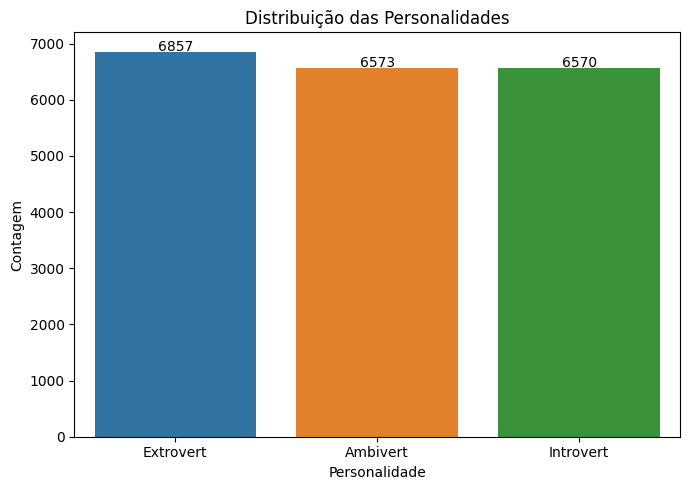

In [ ]:
# Criação do gráfico
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='personality_type', hue='personality_type', data=df, legend=False)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # posição horizontal (centro da barra)
        height + 5,                      # altura acima da barra
        int(height),                     # valor exibido
        ha='center'                      # alinhamento horizontal
    )

# Personalização dos eixos e título
plt.title('Distribuição das Personalidades')
plt.xlabel('Personalidade')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

O gráfico de barras mostra que cada personalidade apresenta valores similares, calculando podemos ver que:

*   Extrovertidos = 6857/20000 = **34,285%**
*   Ambivertidos = 6573/20000 = **32,865%**
*   Introvertidos = 6570/20000 = **32,85%**

Confirmando que o dataset é balanceado em termos de classes.

## Estatísticas Descritivas

As estatíticas das colunas numéricas podem ser extraídas da seguinte forma:

In [ ]:
# estatísticas descritivas básicas do dataset
df.describe()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Como esperado, vemos que os valores dos atributos realmente variam entre zero (0) e dez (10), além disso vemos que os valores das médias estão em sua maioria próximos a 5, indicando que o dataset realmente é balanceado em relação aos tipos de personalidade.

## Análise do Desvio Padrão

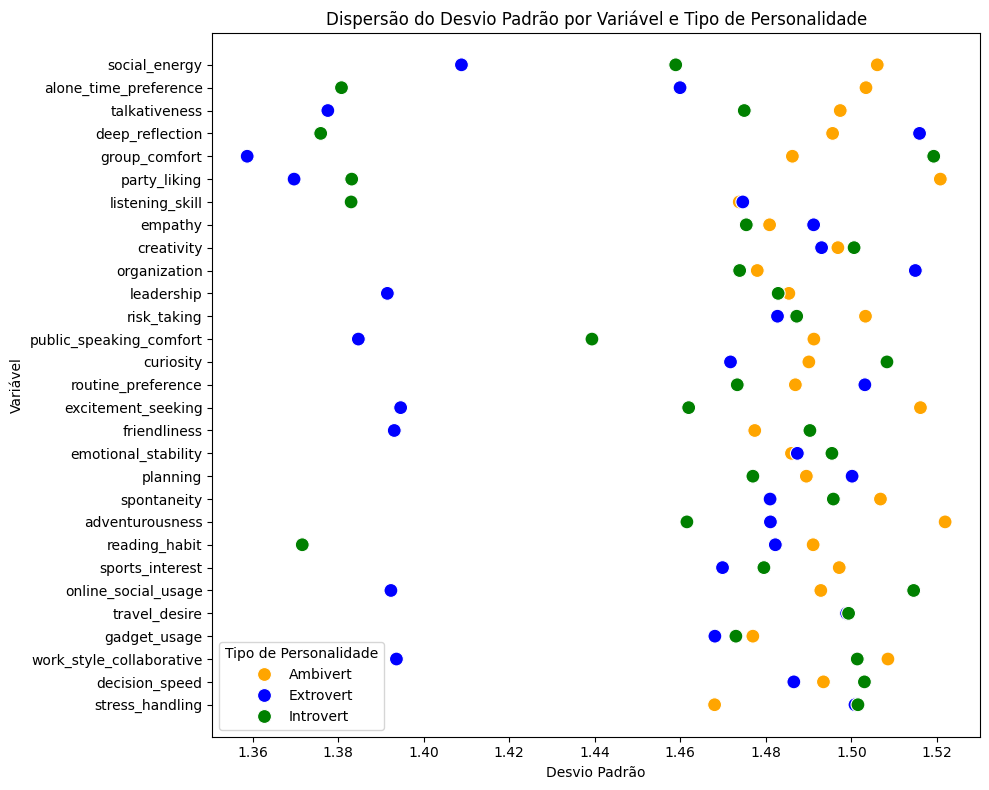

In [ ]:
# Agrupa por tipo de personalidade e calcula desvio padrão
std_por_tipo = df.groupby('personality_type').std(numeric_only=True)

# Transforma para formato longo
std_long = std_por_tipo.T.reset_index().melt(id_vars='index', var_name='personality_type', value_name='std')
std_long.rename(columns={'index': 'variable'}, inplace=True)

# Dicionário de cores
cores = {
    'Introvert': 'green',
    'Extrovert': 'blue',
    'Ambivert': 'orange'
}

# Scatter plot com seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=std_long,
    x='std',
    y='variable',
    hue='personality_type',
    palette=cores,
    s=100  # tamanho dos pontos
)

plt.title('Dispersão do Desvio Padrão por Variável e Tipo de Personalidade')
plt.xlabel('Desvio Padrão')
plt.ylabel('Variável')
plt.legend(title='Tipo de Personalidade')
plt.tight_layout()
plt.show()


Podemos ver no gráfico que os valores de desvio padrão são relativamente baixos, menores do que 1.52, indicando assim que não deve haver uma grande dispersão dos valores em relação a média para nenhuma das personalidades.

## Análise da Média

In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
social_energy,5.509190
alone_time_preference,5.454690
talkativeness,5.525955
deep_reflection,5.958689
group_comfort,6.014381
party_liking,5.040063
listening_skill,6.964450
empathy,6.483220
creativity,5.996018
organization,5.973280


Como o dataset é balanceado o valor da média de todas as personalidades não auxilia muito na análise, visto que todos os valores convergem para 5 ou 6.


In [ ]:
# Agrupando as personalidades antes de calcular a média
df.groupby('personality_type').mean(numeric_only=True)

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
personality_type,,,,,,,,,,,,,,,,,,,,,
Ambivert,5.487189,5.499532,5.505193,6.010245,6.002363,4.983452,7.001478,6.493101,5.995431,5.988027,...,5.460516,5.019460,5.998644,5.465656,6.483922,5.481572,5.990354,6.482269,5.508123,5.991131
Extrovert,7.899779,3.008493,7.951506,4.033245,7.957310,7.961159,5.999934,6.003546,5.999392,4.992914,...,6.957620,6.981690,3.982649,6.985701,7.929156,6.978522,6.989731,7.933724,7.006239,5.963589
Introvert,3.036183,7.962882,3.015219,7.916663,3.998603,2.048000,7.934054,6.973961,5.993083,6.981717,...,4.003841,3.014912,7.926603,3.960896,5.020158,4.002527,4.997667,5.027430,3.969053,5.992026


Para obter resultados mais significativos os dados foram agrupados por tipo de personalidade antes de calcular a média, na expectativa que os valores médios de cada atributo fossem diferentes e pudessem indicar possíveis características-chave.

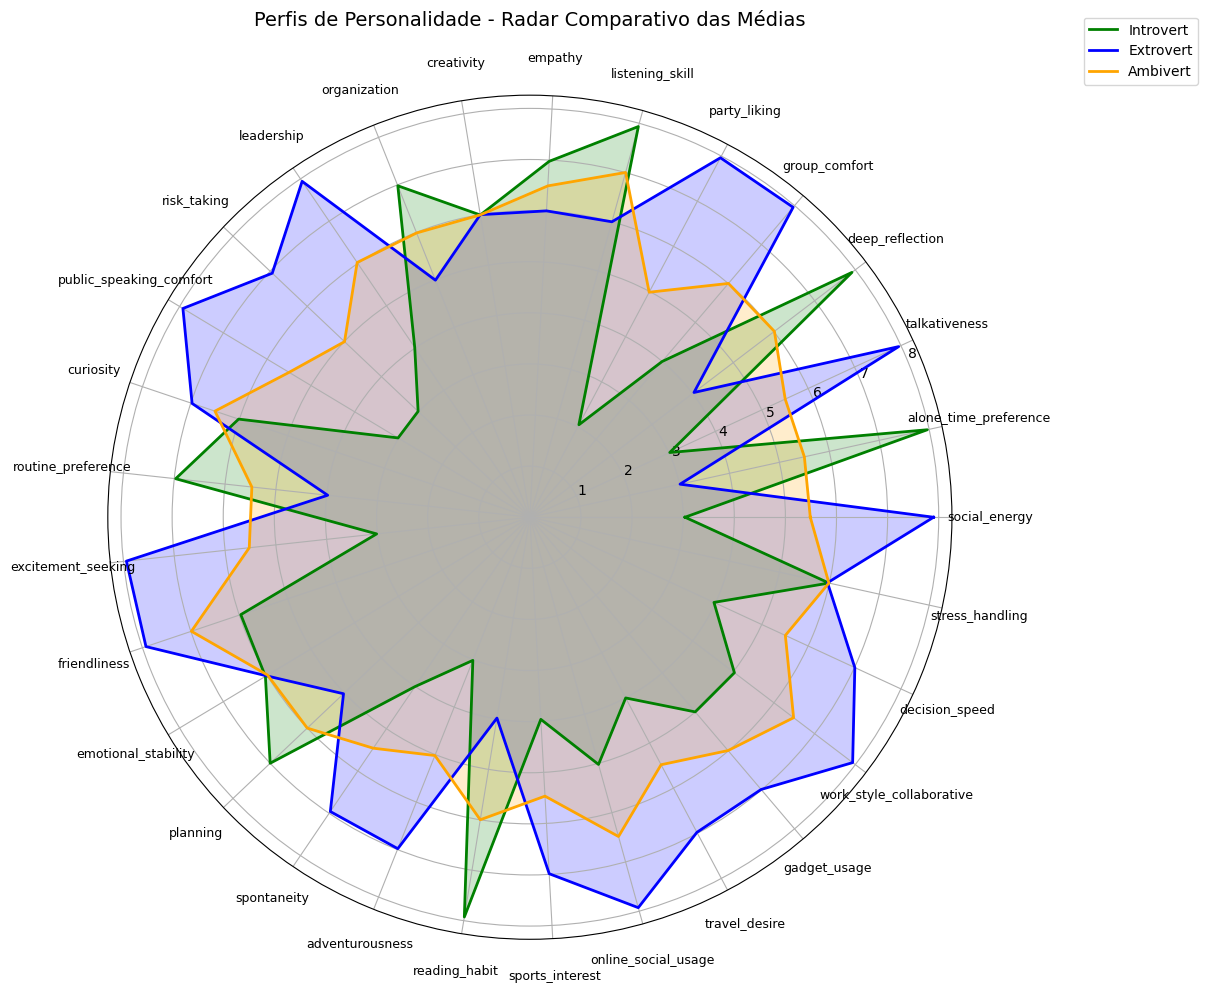

In [ ]:
# Calculando a média de cada variável por tipo de personalidade
mean_por_tipo = df.groupby('personality_type').mean(numeric_only=True)

# Lista de variáveis
variaveis = mean_por_tipo.columns.tolist()
num_variaveis = len(variaveis)

# Ângulos para os eixos
angles = np.linspace(0, 2 * np.pi, num_variaveis, endpoint=False).tolist()
angles += angles[:1]  # Fecha o círculo

# Função para formatar os valores para radar
def valores_para_radar(valores):
    return valores.tolist() + valores.tolist()[:1]

# Cria o gráfico
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, polar=True)

# Remove os labels padrão
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])

# Distância radial maior para os rótulos
label_radius = 9  # Aumente esse valor para afastar mais

# Adiciona os rótulos
for i, angle in enumerate(angles[:-1]):
    ax.text(
        angle,
        label_radius,
        variaveis[i],
        fontsize=9,
        ha='center',
        va='center',
        rotation=0
    )

# Cores para cada perfil
cores = {
    'Introvert': 'green',
    'Extrovert': 'blue',
    'Ambivert': 'orange'
}

# Adiciona os 3 perfis ao gráfico
for tipo in ['Introvert', 'Extrovert', 'Ambivert']:
    valores = valores_para_radar(mean_por_tipo.loc[tipo])
    ax.plot(angles, valores, label=tipo.capitalize(), color=cores[tipo], linewidth=2)
    ax.fill(angles, valores, color=cores[tipo], alpha=0.2)

# Legenda e título
plt.title('Perfis de Personalidade - Radar Comparativo das Médias', size=14, pad=50)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Nesse gráfico podemos ver que os valores médios de algumas propriedades já aparentam ser bons indicativos para alguns tipos de personalidade, possívelmente características-chave, já que tem valores muito altos para uma personalidade e baixos para a outra, como por exemplo:

* *alone time preference* >  **8** para introvertidos, **5.5** para ambivertidos e **3** para extrovertidos
* *reading habit* > **8** para introvertidos, **6** para ambivertidos e **4** pra extrovertidos
* *deep reflection* > **8** para introvertidos, **6** para ambivertidos e **5** pra extrovertidos
* *party liking* > **2** para introvertidos, **5** para ambivertidos e **8** pra extrovertidos
* *public speaking comfort* > **3** para introvertidos, **5.5** para ambivertidos e **8** pra extrovertidos
* *group comfort* > **4** para introvertidos, **6** para ambivertidos e **8** pra extrovertidos

Vemos também que ambivertidos tem num geral valores entre introvertidos e extrovertidos, portanto esse tipo de personalidade deve ser representado pela falta de características-chave de introvertido e extrovertido.



## Histograma

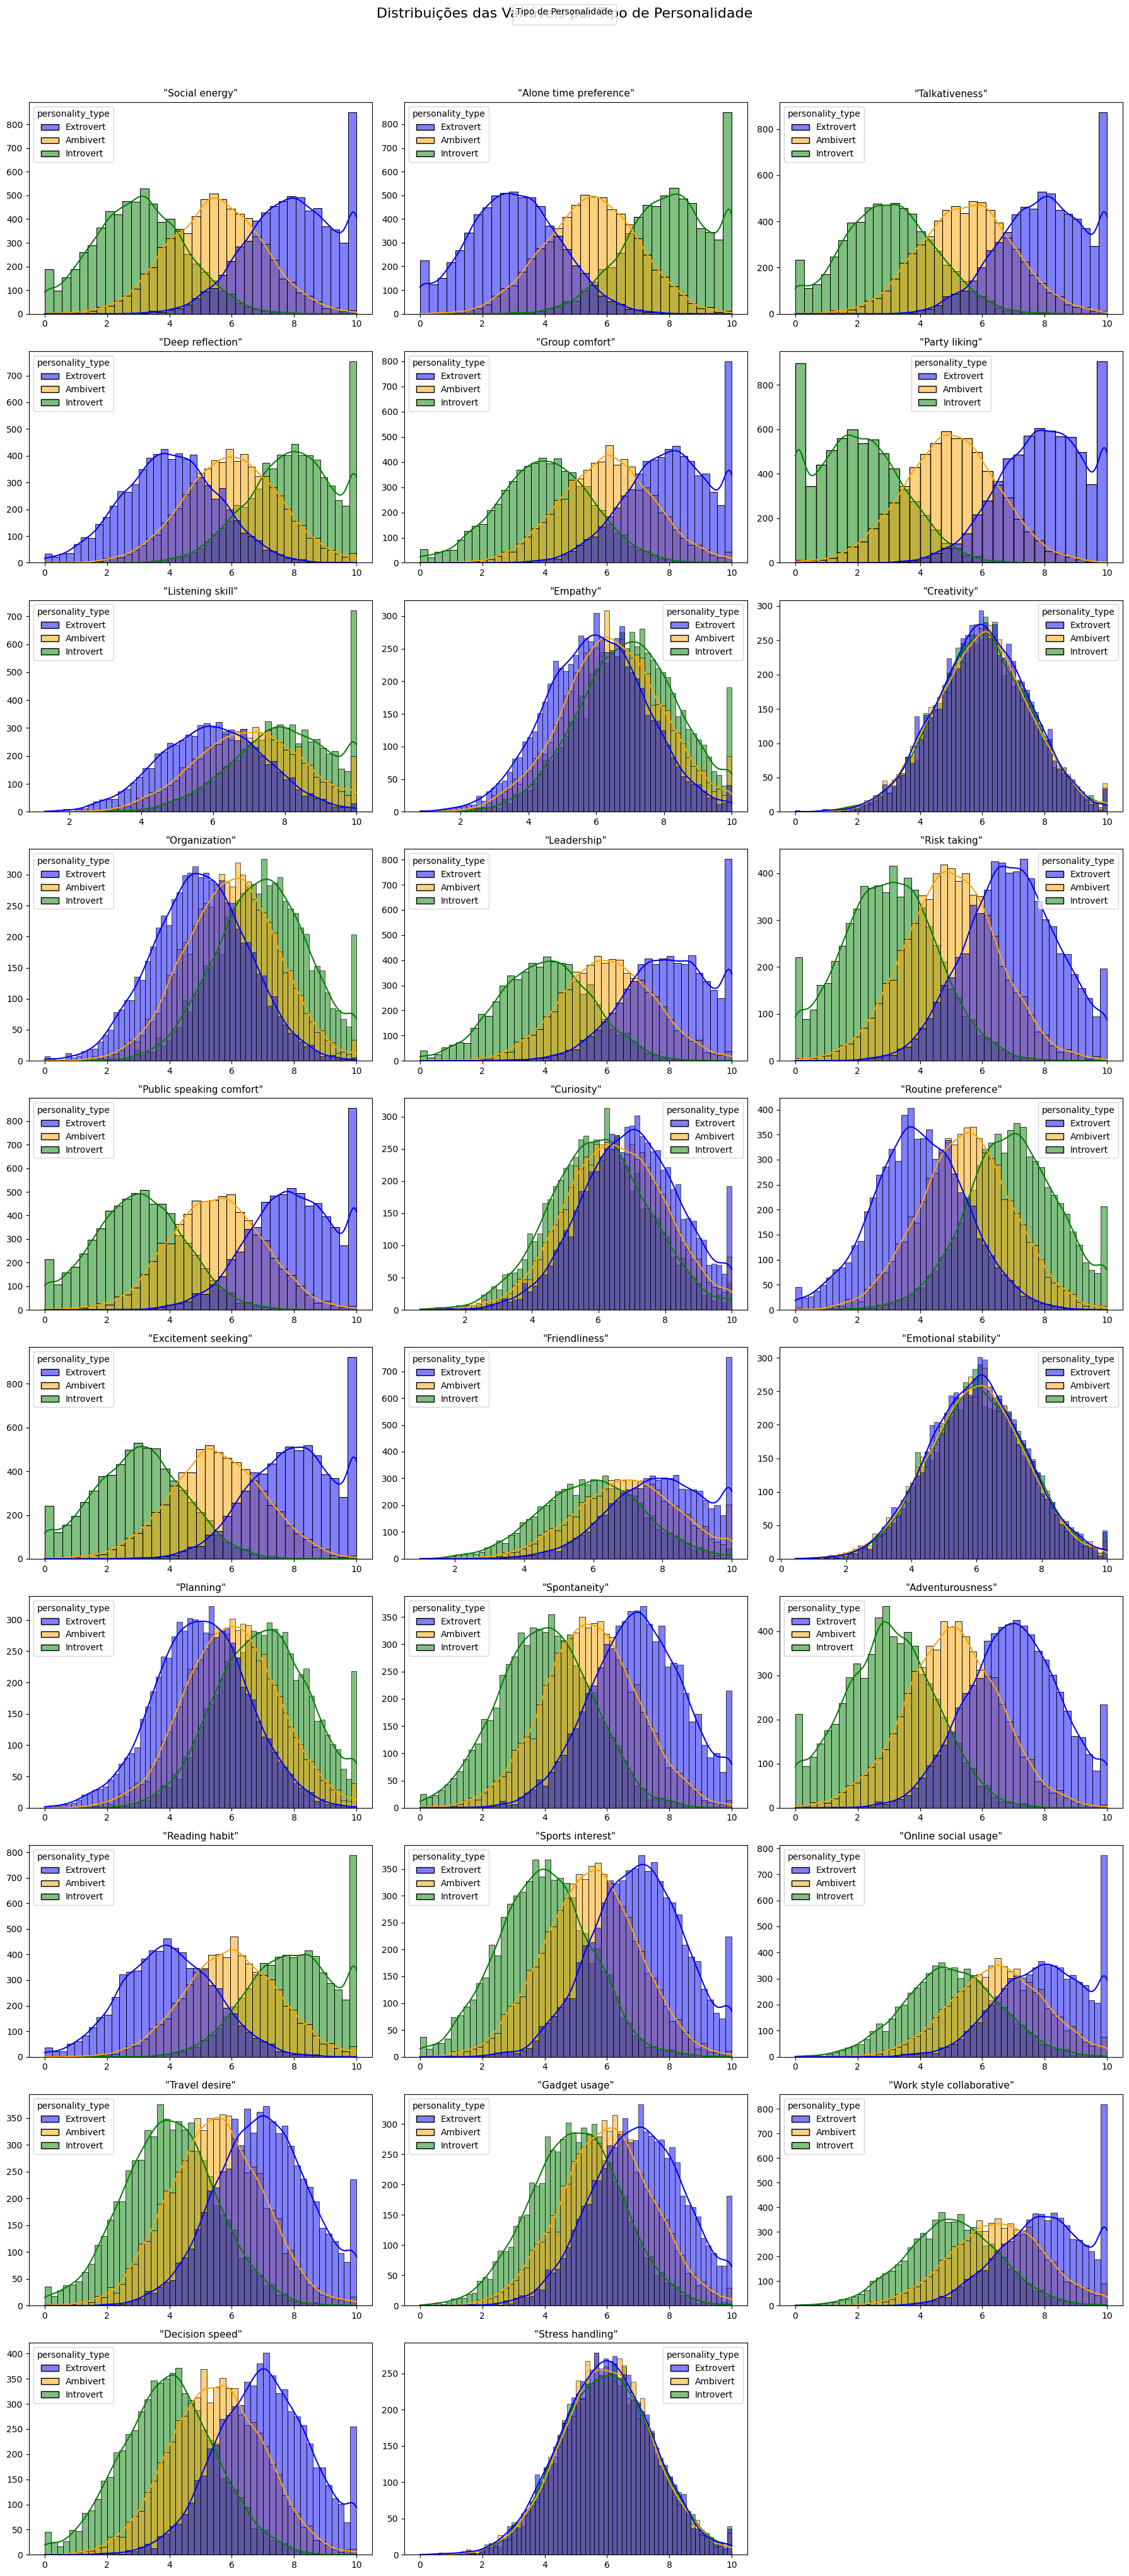

In [ ]:
# Tipos e cores
tipos = ['Introvert', 'Extrovert', 'Ambivert']
cores = {
    'Introvert': 'green',
    'Extrovert': 'blue',
    'Ambivert': 'orange'
}

# Lista de variáveis numéricas
variaveis = df.select_dtypes(include='number').columns.tolist()
n = len(variaveis)

# Configurações de grid
cols = 3
rows = math.ceil(n / cols)

# Criando a grade de subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, var in enumerate(variaveis):
    sns.histplot(
        data=df,
        x=var,
        hue='personality_type',
        kde=True,
        element='bars',
        stat='count',
        common_norm=False,
        palette=cores,
        ax=axes[i]
    )
    axes[i].set_title(f'"{var.replace("_", " ").capitalize()}"', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove subplots vazios, se existirem
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda geral
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Tipo de Personalidade', loc='upper center', ncol=3)

plt.suptitle('Distribuições das Variáveis por Tipo de Personalidade', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


As curvas de densidade estimada (KDE) nos indicam que as distribuições são em sua grande maioria multimodais. As características que temos mais claras separações entre os diferentes tipos de personalidade para o grupo escolhido de características:
* “Social energy”
* "Alone time preference"
* “Talkativeness”
* "Deep reflection"
* "Group comfort"
* "Party liking"
* “Leadership”
* “Risk taking”
* "Public speaking comfort"
* “Excitement seeking”
* “adventurousness”
* “sports interest”
* "Reading habit"

De forma análoga, nem todas tem uma separação tão boa entre os tipos de personalidade, logo podem ser descartadas como características-chave, por exemplo:

* "Stress handling"
* "Emotional stability"
* "Curiosity"
* "Creativity"
* "Empathy"





## Boxplot


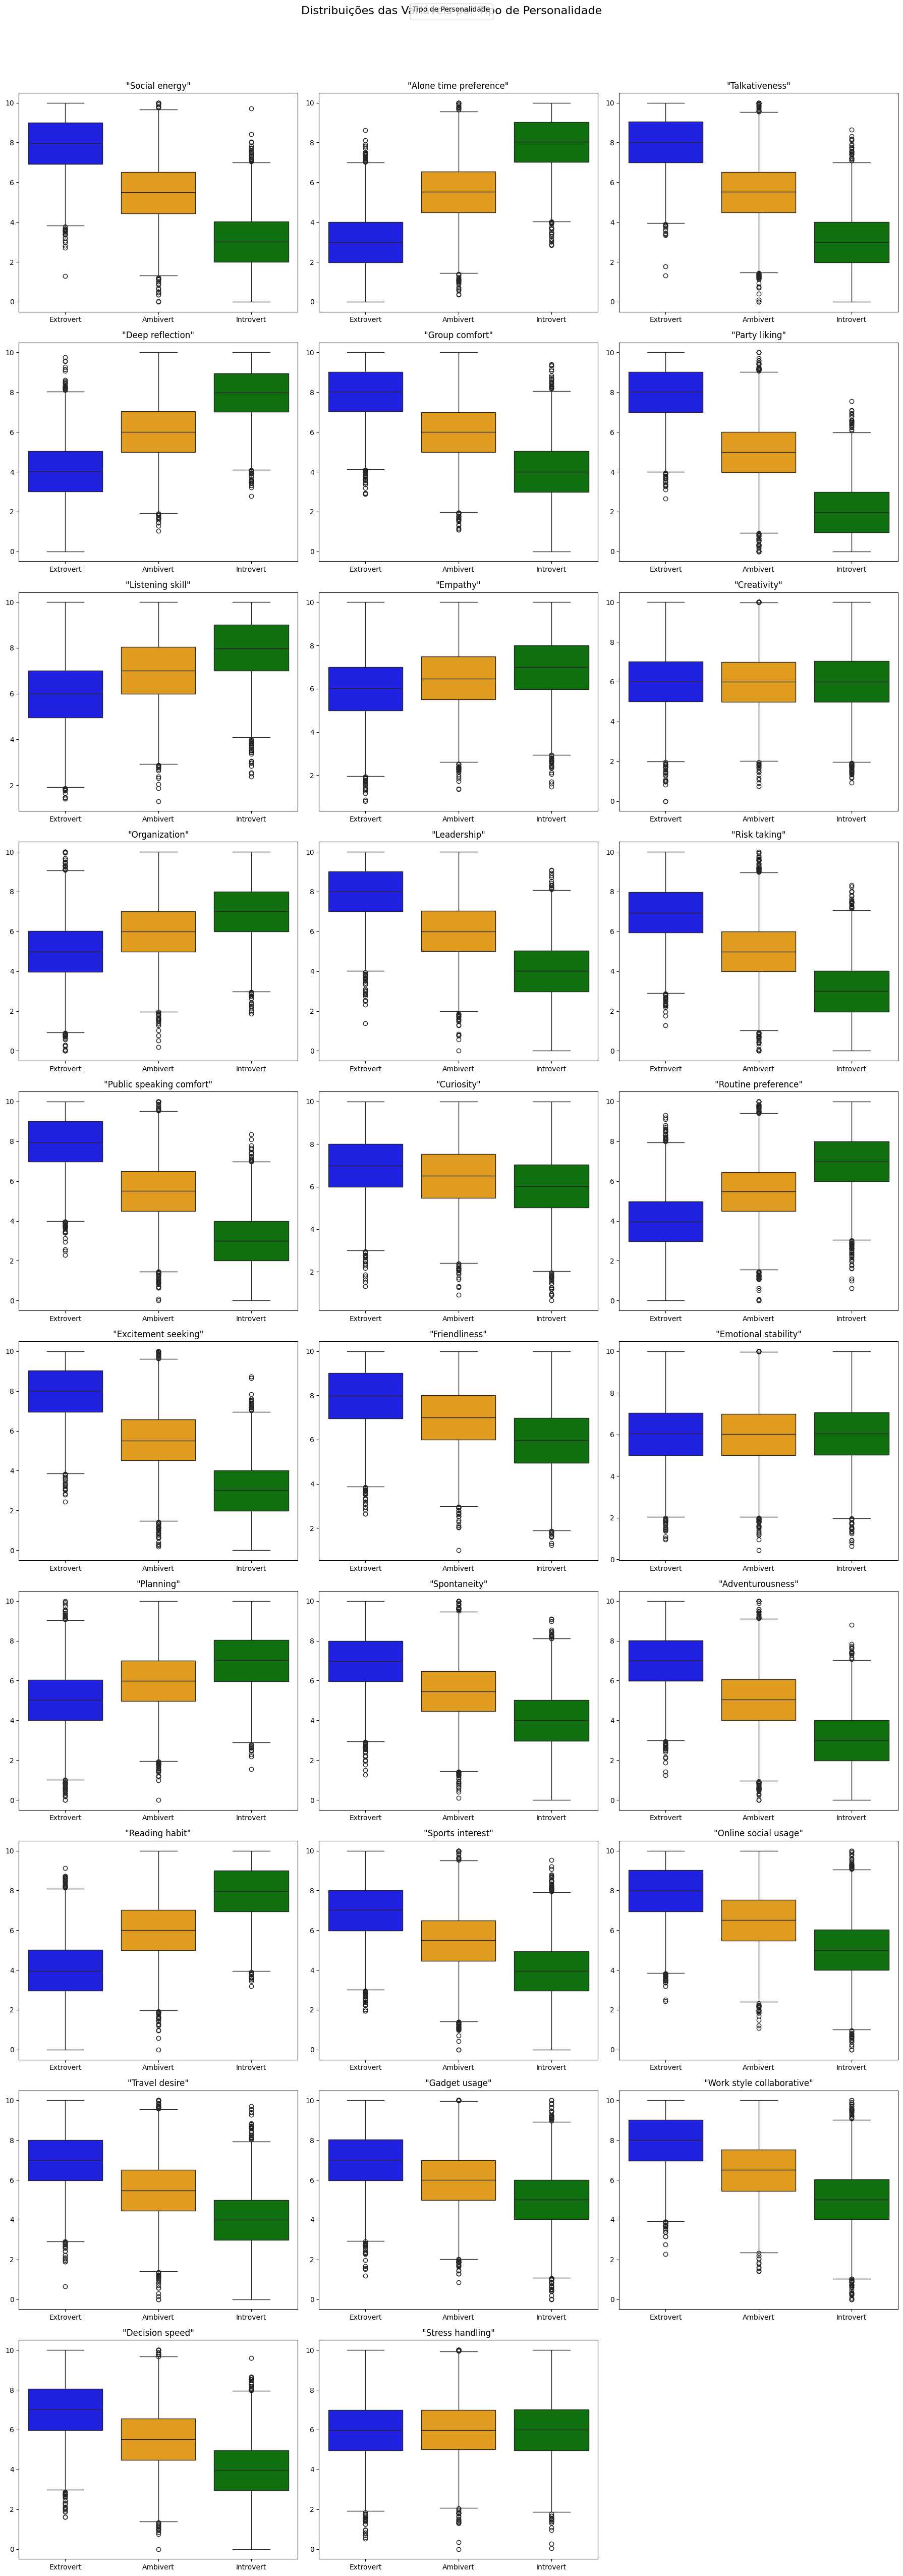

In [ ]:
# Paleta personalizada
cores = {
    'Introvert': 'green',
    'Extrovert': 'blue',
    'Ambivert': 'orange'
}

# Lista de variáveis numéricas
variaveis = df.select_dtypes(include='number').columns.tolist()
n = len(variaveis)

# Definindo número de colunas e linhas para o grid
cols = 3
rows = math.ceil(n / cols)

# Criando os subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()  # transforma em vetor para iterar

for i, var in enumerate(variaveis):
    sns.boxplot(
        data=df,
        x='personality_type',
        y=var,
        hue='personality_type',
        palette=cores,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'"{var.replace("_", " ").capitalize()}"', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove subplots vazios (caso o número de variáveis não seja múltiplo de cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda geral
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Tipo de Personalidade', loc='upper center', ncol=3)

plt.suptitle('Distribuições das Variáveis por Tipo de Personalidade', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


O boxplot das características mostra que nem todas tem uma separação tão boa entre os tipos de personalidade, logo podem ser descartadas como características-chave, por exemplo:

* "Stress handling"
* "Emotional stability"
* "Curiosity"
* "Creativity"
* "Empathy"

Em contrapartida podemos ver que as seguintes características tem uma separação boa, considerando principalmente os valores de Q1 e Q3:

* "Social energy"
* "Alone time preference"
* "Talkativeness"
* "Deep reflection"
* "Group Comfort"
* "Party liking"
* "Leadership"
* "Risk taking"
* "Public speaking confort"
* "Excitement seeking"
* “Adventurousness”
* "Reading habit"


##  Matriz de Correlação

In [ ]:
df.iloc[:, 1:30].corr()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
social_energy,1.000000,-0.654726,0.657548,-0.595024,0.600819,0.696256,-0.391711,-0.210702,0.003439,-0.381587,...,0.516319,0.602295,-0.593950,0.515184,0.513714,0.505383,0.385225,0.505482,0.511334,-0.001252
alone_time_preference,-0.654726,1.000000,-0.658442,0.598747,-0.606488,-0.702538,0.395045,0.209842,-0.000802,0.394110,...,-0.518212,-0.599756,0.606381,-0.523267,-0.512948,-0.519675,-0.398298,-0.509340,-0.526784,0.002054
talkativeness,0.657548,-0.658442,1.000000,-0.595642,0.602341,0.699113,-0.396942,-0.206566,0.000732,-0.395587,...,0.510880,0.605093,-0.605081,0.523663,0.515386,0.511840,0.392204,0.513349,0.519035,-0.002229
deep_reflection,-0.595024,0.598747,-0.595642,1.000000,-0.545189,-0.635852,0.359396,0.189660,0.007595,0.359004,...,-0.459011,-0.543586,0.546049,-0.466185,-0.464402,-0.459070,-0.355450,-0.460659,-0.470996,0.002721
group_comfort,0.600819,-0.606488,0.602341,-0.545189,1.000000,0.643558,-0.368349,-0.189119,0.008365,-0.359493,...,0.468917,0.545587,-0.555507,0.479155,0.466763,0.464743,0.362587,0.475264,0.475904,-0.005268
party_liking,0.696256,-0.702538,0.699113,-0.635852,0.643558,1.000000,-0.413945,-0.221757,-0.000558,-0.415305,...,0.546361,0.635631,-0.640000,0.555671,0.539368,0.543858,0.414924,0.542184,0.549641,-0.012387
listening_skill,-0.391711,0.395045,-0.396942,0.359396,-0.368349,-0.413945,1.000000,0.124744,-0.010125,0.224087,...,-0.306856,-0.351312,0.357068,-0.307160,-0.307916,-0.307071,-0.237891,-0.299893,-0.298741,-0.008031
empathy,-0.210702,0.209842,-0.206566,0.189660,-0.189119,-0.221757,0.124744,1.000000,-0.013908,0.134095,...,-0.168120,-0.187131,0.194420,-0.165008,-0.160410,-0.164178,-0.125468,-0.172934,-0.167321,-0.003407
creativity,0.003439,-0.000802,0.000732,0.007595,0.008365,-0.000558,-0.010125,-0.013908,1.000000,0.003087,...,0.001773,0.003576,0.003189,-0.002150,-0.008520,0.002487,0.000121,0.003696,0.001499,-0.000754
organization,-0.381587,0.394110,-0.395587,0.359004,-0.359493,-0.415305,0.224087,0.134095,0.003087,1.000000,...,-0.303235,-0.353344,0.360127,-0.302548,-0.300454,-0.303142,-0.236453,-0.304044,-0.298850,0.016673


Como a quantidade de colunas é muito grande , a visualização em uma única matriz fica comprometida, portanto optou-se por fazer duas matrizes, uma filtrando valores de correlação moderada 0.5 ≤ |r| e outra filtrando correlação forte 0.7 ≤ |r|.

In [ ]:
# Calcula a matriz de correlação completa
corr_matrix = df.iloc[:, 1:30].corr()

# Define um limite de corte
limite_moderada = 0.5
limite_forte = 0.7

# Cria uma máscara onde apenas correlações moderadas permanecem
filtro_moderada = corr_matrix.where((corr_matrix.abs() >= limite_moderada) & (corr_matrix.abs() < 1.0))
filtro_forte = corr_matrix.where((corr_matrix.abs() >= limite_forte) & (corr_matrix.abs() < 1.0))

# Seleciona apenas as colunas que têm pelo menos uma correlação moderada a muito forte
cols_moderadas = filtro_moderada.columns[filtro_moderada.notna().any()].tolist()
cols_fortes = filtro_forte.columns[filtro_forte.notna().any()].tolist()


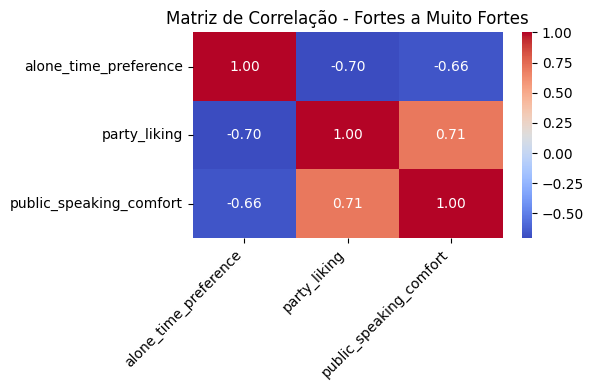

In [ ]:
# Cria gráfico para correlações fortes a muito fortes
plt.figure(figsize=(6, 4))
sns.heatmap(df[cols_fortes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Fortes a Muito Fortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O mapa de calor da 'Matriz de Correlação -  Fortes a Muito Fortes' revela as maiores correlações entre as características:

* positiva entre *party liking* e *public speaking comfort*, ou seja ambas tendem a ter valores parecidos, indicando que pertencem a mesma personalidade.

* negativa entre *alone time preference* ou *public speaking comfort* e *party liking*, logo quando uma tem valor alto, podemos excluir a personalidade da outra, por exemplo, valores altos de *party liking* implicam em valores baixos de *alone time preference*, nesse caso levando a uma personalidade extrovertida.


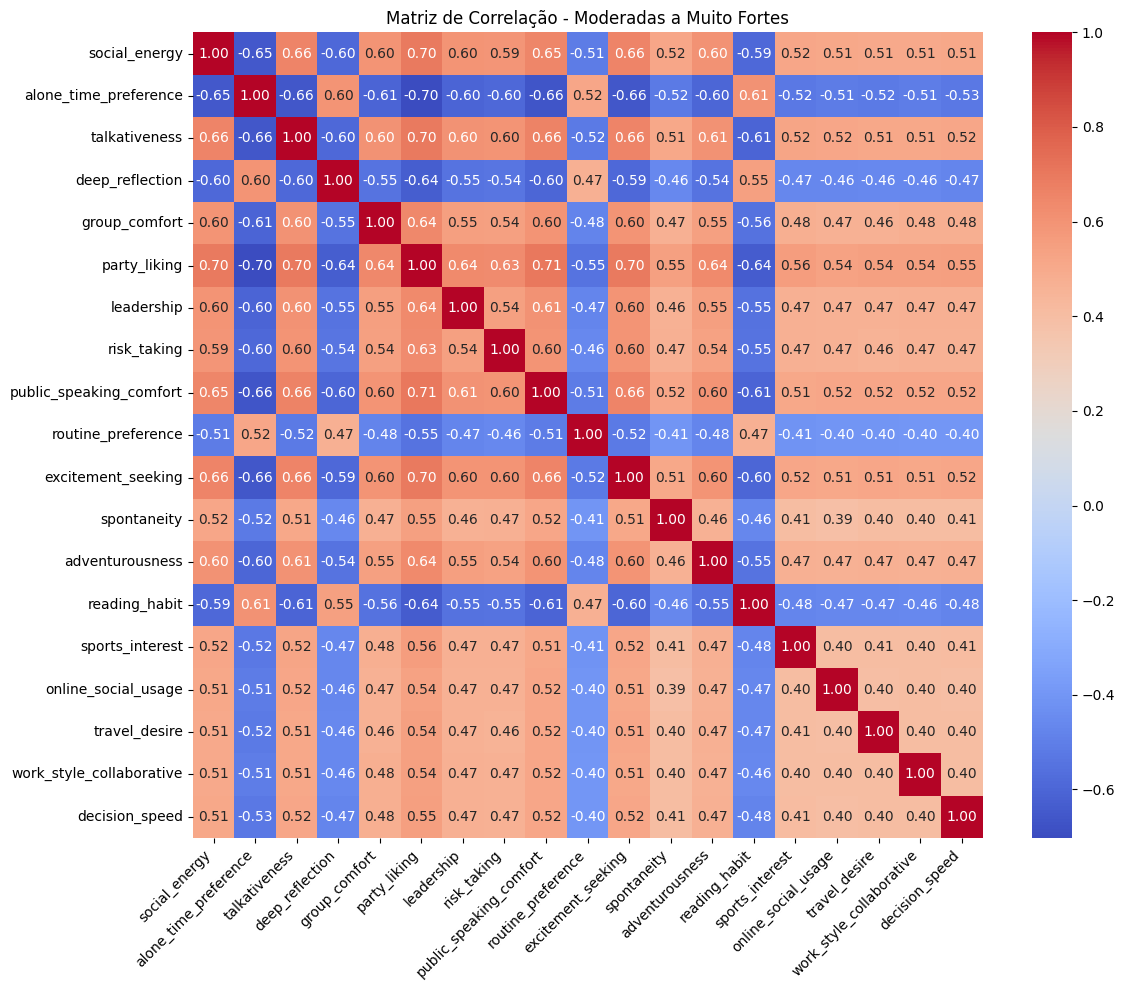

In [ ]:
# Cria gráfico para correlações moderadas a muito fortes
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols_moderadas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Moderadas a Muito Fortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Observando a 'Matriz de Correlação - Moderadas a Muito Forte' podemos considerar algumas características com valores razoáveis para serem considerados característica-chave:
* "Social energy"
* "Talkativeness"
* "Deep reflection"
* "Group confort"
* "Leadership"
* "Risk taking"
* "Routine preference"
* "Excitement seeking"
* "Spontaneity"
* "Adventurouness"
* "Reading habit"
* "Sports interest"
* "Online social usage"
* "Travel desire"
* "Work style collaboration"
* "Decision speed"


## Resumo da Análise Exploratória
Considerando os resultados obtidos em todos os gráficos, podemos ver que algumas características se destacam em todos eles, podendo então ser considerados características-chave:
* "Alone time preference"
* "Public speaking confort"
* "Party liking"
* "Social energy"
* "Talkativeness"
* "Deep reflection"
* "Group confort"
* "Leadership"
* "Risk taking"
* "Excitement seeking"
* "Adventurouness"
* "Reading habit"

# **4) Pré-Processamento de Dados**

## Tratamento de Valores Nulos

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
personality_type,0
social_energy,0
alone_time_preference,0
talkativeness,0
deep_reflection,0
group_comfort,0
party_liking,0
listening_skill,0
empathy,0
creativity,0


Como podemos observar acima, não existem valores nulos, logo não há necessidade de tratamento.

## Ajustando as colunas

Como visto anteriormente, algumas características não apresentam separação entre as personalidades, portanto decidiu-se por removê-las.



In [ ]:
# Removendo colunas que não serão usadas
df=df.drop(columns=["stress_handling","emotional_stability","curiosity","creativity","empathy"],errors='ignore')

## One Hot Encoding

In [ ]:
# Padronização completa para evitar problemas com espaços nas strings
df['personality_type'] = df['personality_type'].astype(str).str.strip()

# definindo o transformador como one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# transformando os dados
onehot = encoder.fit_transform(df[['personality_type']])

# criando um dataframe com os dados transformados
df_encoded = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(['personality_type']))
print(df_encoded)

# concatenando em um único dataframe
df = pd.concat([df, df_encoded], axis=1)
print(df)

       personality_type_Ambivert  personality_type_Extrovert  \
0                            0.0                         1.0   
1                            1.0                         0.0   
2                            1.0                         0.0   
3                            0.0                         1.0   
4                            0.0                         0.0   
...                          ...                         ...   
19995                        1.0                         0.0   
19996                        0.0                         0.0   
19997                        0.0                         0.0   
19998                        0.0                         1.0   
19999                        0.0                         0.0   

       personality_type_Introvert  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             1.0  
...            

Este dataset será usado futuramente para machine learning, portanto é necessário usar o one hot encoding para representar os valores de "Extrovert", "Introvert" e "Ambivert" em vetores numéricos.

## Normalização

Os valores do dataset variam entre zero(0) e dez (10), então optou-se por normalizar os dados.



In [ ]:
# Separar features (X) e target (y)
X = df.drop('personality_type', axis=1)
y = df['personality_type']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (14000, 27)
Dimensões de X_test: (6000, 27)
Dimensões de y_train: (14000,)
Dimensões de y_test: (6000,)


In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   social_energy  alone_time_preference  talkativeness  deep_reflection  \
0       0.837780               0.243153       0.687312         0.496316   
1       0.061781               0.752573       0.377877         0.619883   
2       0.429409               0.354499       0.828957         0.690273   
3       0.165608               0.747072       0.420795         0.673985   
4       0.600940               0.553824       0.871221         0.189204   

   group_comfort  party_liking  listening_skill  organization  leadership  \
0       1.000000      0.694732         0.494274      0.589526    0.993136   
1       0.268440      0.274094         0.442150      0.484376    0.047112   
2       0.668112      0.629743         0.694258      0.641992    0.576077   
3       0.483177      0.248339         0.887383      0.623007    0.453913   
4       0.453717      0.517896         0.746224      0.806045    0.761980   

   risk_taking  ...  reading_habi

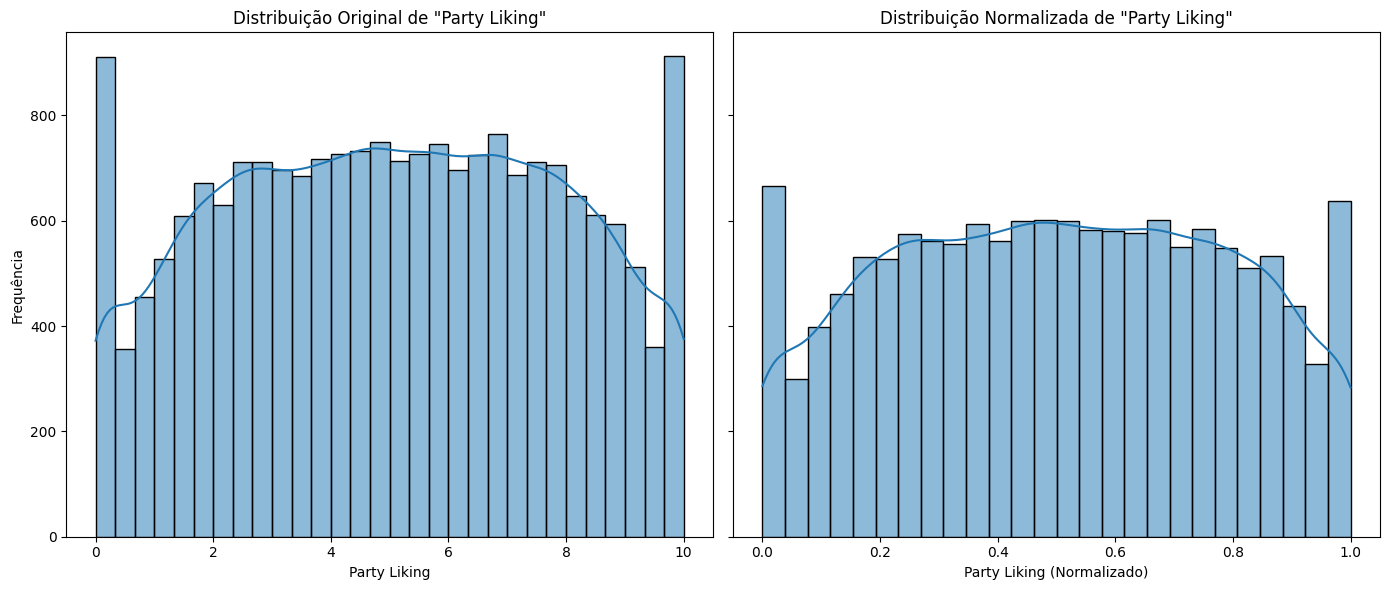

In [ ]:
# Cria dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico 1: valor original
sns.histplot(df['party_liking'], kde=True, ax=axes[0])
axes[0].set_title('Distribuição Original de "Party Liking"')
axes[0].set_xlabel('Party Liking')
axes[0].set_ylabel('Frequência')

# Gráfico 2: valor normalizado
sns.histplot(df_normalized['party_liking'], kde=True, ax=axes[1])
axes[1].set_title('Distribuição Normalizada de "Party Liking"')
axes[1].set_xlabel('Party Liking (Normalizado)')
axes[1].set_ylabel('')  # Remove label redundante

# Ajusta layout para evitar sobreposição
plt.tight_layout()
plt.show()


O histograma de *party liking* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

# **5) Conclusão**

O dataset é completo, limpo,  e balanceado visto que não foram necessárias alterações nos dados, não haviam dados faltantes, os valores máximos e mínimos realmente estavam dentro das faixas informadas pelo site de origem.

As características numéricas bem definidas permitem uma clara separação entre os tipos de personalidade.

A análise exploratória revelou correlações importantes entre as características  e a eficácia de visualizações como histogramas, boxplots e matriz de correlação foram úteis para definir as características-chave para distinguir as personalidades.

As etapas de normalização foram utilizadas para preparar os dados para algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *Existem características mais importantes que outras para a determinação da personalidade?* Sim. O grupo de características-chave é:
* "Alone time preference"
* "Public speaking confort"
* "Party liking"
* "Social energy"
* "Talkativeness"
* "Deep reflection"
* "Group confort"
* "Leadership"
* "Risk taking"
* "Excitement seeking"
* "Adventurouness"
* "Reading habit"

2.   *A personalidade ambivertida seria apenas uma exclusão de valores altos em características-chave para a classificação de personalidade?* Sim, quando os valores das características-chave não representam a personalidade introvertida ou extrovertida a classificação encontrada era ambivertida.

3.   *A personalidade introvertida é mais facilmente separável das outras duas personalidades?* Sim. Para ter uma classificação introvertida é necessário ter valores altos em menos características.